In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

In [9]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

data = numeric data in form of array

images = actual image

target = actual digit

In [10]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

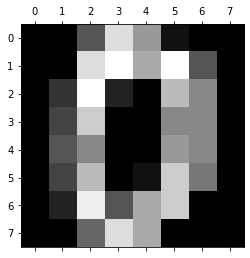

In [11]:
plt.gray()
plt.matshow(digits['images'][0])

In [14]:
print(digits.DESCR[0])
print(digits.feature_names[0])
print(digits.target[0])
print(digits.target_names[0])

.
pixel_0_0
0
0


<Figure size 432x288 with 0 Axes>

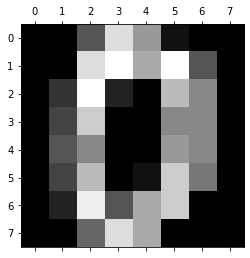

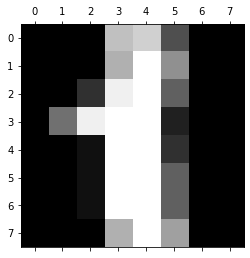

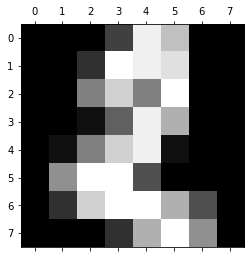

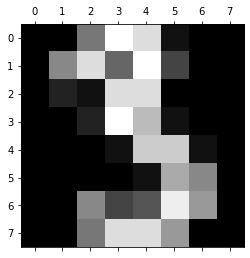

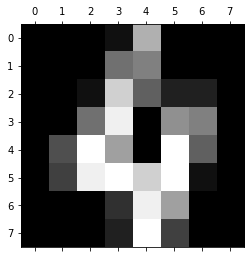

In [15]:
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 

In [16]:
for i in range(5):
    print(digits['target'][i])

0
1
2
3
4


#### For our logistic regression model, 
input variable = data

target variable = target

In [18]:
X_train, X_test, y_train, y_test = train_test_split(digits['data'], digits['target'], test_size =0.2)

In [19]:
print(len(X_train))
print(len(X_test))

1437
360


In [20]:
model = LogisticRegression()

In [21]:
model.fit(X_train, y_train)

C:\Users\Manoj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
model.score(X_test, y_test)

0.9611111111111111

8

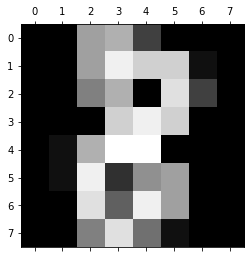

In [25]:
# getting random image
plt.matshow(digits.images[28]) 

# getting to know its corresponding actual value
digits['target'][28]

In [27]:
# predicting the number using corresponding data to see if prediction = actual number (target)
model.predict([digits['data'][28]])

array([8])

In [29]:
model.predict(digits['data'][0:5])

array([0, 1, 2, 3, 4])

In [33]:
predictions = model.predict(X_test)

In [35]:
cm = confusion_matrix(y_test, predictions)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 34,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  1, 36,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  1, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 34,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 41]], dtype=int64)

Text(69.0, 0.5, 'Truth')

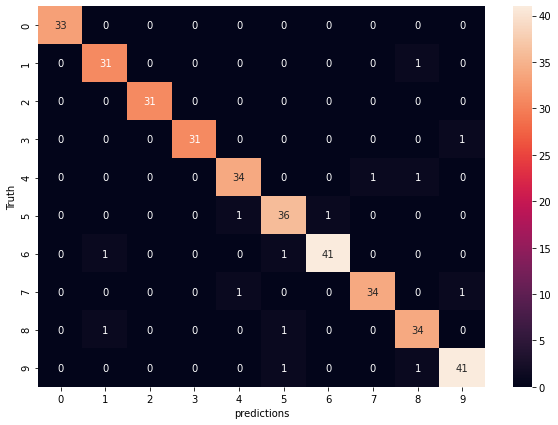

In [40]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("predictions")
plt.ylabel("Truth")